#### Name Dipika Sharma
#### DSC 550 T302 Data Mining
#### Week 5

# Exercise 5.2

In [1]:
## Importing the required libraries

import pandas as pd
import numpy as np

### 1. Get the stemmed data using the same process you did in Week 3.

In [2]:
## Lets import movie review data as a dataframe.

Movie_Review_df = pd.read_csv('labeledTrainData.tsv',sep = '\t')

In [3]:
## Lets check how the top 5 rows looks in dataset.

Movie_Review_df.head(5)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
## Looking at the Kaggle website under data section we know "Sentiment of the review; 1 for positive reviews and 0 for negative reviews"
## Using grouby function on sentiment column to get the total number of positive and negative reviews

Movie_Review_pos_neg_df = Movie_Review_df.groupby('sentiment').count() 
Movie_Review_pos_neg_df

,id,review
sentiment,,
0,12500,12500
1,12500,12500


In [5]:
## Installing the TextBlob library

! pip install -U textblob

In [6]:
from textblob import TextBlob

In [7]:
## Assuming polarity score greather than or equal to zero is positive sentiment and less then 0 is negative sentiment.
## Adding polarity and subjectivity column in data frame

Movie_Review_df[['polarity', 'subjectivity']] = Movie_Review_df['review'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [8]:
## Lets check the top 5 rows of the data frame

Movie_Review_df.head(5)

,id,sentiment,review,polarity,subjectivity
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818


In [9]:
## Lets calculate the textblobe score using the polarity column

Movie_Review_df['score'] = np.where(Movie_Review_df['polarity'] >= 0, 1, 0)

In [10]:
## Lets check the top 5 rows of the dataframe to check if it is calculating the score correctly.

Movie_Review_df.head(5)

,id,sentiment,review,polarity,subjectivity,score
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0


In [11]:
## using str.lower() function to convert text to lowercase leters.

Movie_Review_df['review'] = Movie_Review_df['review'].str.lower()

In [12]:
## Using str.replace to replace punctuation and special character from text.

Movie_Review_df['review'] = Movie_Review_df['review'].str.replace(r'[^\w\s]+', '')

/var/folders/k0/kqs3mw2j4pl9s5fvm4jvh09h0000gn/T/ipykernel_24635/857249495.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  Movie_Review_df['review'] = Movie_Review_df['review'].str.replace(r'[^\w\s]+', '')


In [13]:
## Lets check the top five rows of the data frame.

Movie_Review_df.head(5)

,id,sentiment,review,polarity,subjectivity,score
0,5814_8,1,with all this stuff going down at the moment w...,0.001277,0.606746,1
1,2381_9,1,the classic war of the worlds by timothy hines...,0.256349,0.531111,1
2,7759_3,0,the film starts with a manager nicholas bell g...,-0.053941,0.562933,0
3,3630_4,0,it must be assumed that those who praised this...,0.134753,0.492901,1
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0


In [14]:
## Lets import nltk module and import stopwords and word_tokenize

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
## Lets import the stopwords using nltk module

stop = stopwords.words('english')

In [16]:
## removing the stopwords from review column in data frame.

Movie_Review_df['review'] = Movie_Review_df['review'].apply(lambda review: ' '.join([word for word in review.split() if word not in (stop)]))

In [17]:
## Lets check the top 5 rows of the data frame

Movie_Review_df.head(5)

,id,sentiment,review,polarity,subjectivity,score
0,5814_8,1,stuff going moment mj ive started listening mu...,0.001277,0.606746,1
1,2381_9,1,classic war worlds timothy hines entertaining ...,0.256349,0.531111,1
2,7759_3,0,film starts manager nicholas bell giving welco...,-0.053941,0.562933,0
3,3630_4,0,must assumed praised film greatest filmed oper...,0.134753,0.492901,1
4,9495_8,1,superbly trashy wondrously unpretentious 80s e...,-0.024842,0.459818,0


In [18]:
## lets import PorterStemmer using nltk module.

from nltk.stem import PorterStemmer

In [19]:
## Lets create Pstemmer variable

Pstemmer = PorterStemmer()

In [20]:
## Lets create a new column and tokenize the review column

Movie_Review_df['review_PStemmer'] = Movie_Review_df['review'].apply(lambda review : filter(None,review.split(" ")))

In [21]:
## Now apply the stemmer to the newly created tikenize column.

Movie_Review_df['review_PStemmer'] = Movie_Review_df['review_PStemmer'].apply(lambda reviewPS : [Pstemmer.stem(y) for y in reviewPS])

In [22]:
## create sentence using stemmer column

Movie_Review_df['review_PStemmer_new'] = Movie_Review_df['review_PStemmer'].apply(lambda reviewPS : " ".join(reviewPS))

In [23]:
## Lets check the top five rows of the data frame

Movie_Review_df.head(5)

,id,sentiment,review,polarity,subjectivity,score,review_PStemmer,review_PStemmer_new
0,5814_8,1,stuff going moment mj ive started listening mu...,0.001277,0.606746,1,"[stuff, go, moment, mj, ive, start, listen, mu...",stuff go moment mj ive start listen music watc...
1,2381_9,1,classic war worlds timothy hines entertaining ...,0.256349,0.531111,1,"[classic, war, world, timothi, hine, entertain...",classic war world timothi hine entertain film ...
2,7759_3,0,film starts manager nicholas bell giving welco...,-0.053941,0.562933,0,"[film, start, manag, nichola, bell, give, welc...",film start manag nichola bell give welcom inve...
3,3630_4,0,must assumed praised film greatest filmed oper...,0.134753,0.492901,1,"[must, assum, prais, film, greatest, film, ope...",must assum prais film greatest film opera ever...
4,9495_8,1,superbly trashy wondrously unpretentious 80s e...,-0.024842,0.459818,0,"[superbl, trashi, wondrous, unpretenti, 80, ex...",superbl trashi wondrous unpretenti 80 exploit ...


In [24]:
## Lets use the shape function to see number of of columns and rows in a dataframe
Movie_Review_df.shape

(25000, 8)

In [25]:
## Lets check the columns types.
Movie_Review_df.dtypes

id                      object
sentiment                int64
review                  object
polarity               float64
subjectivity           float64
score                    int64
review_PStemmer         object
review_PStemmer_new     object
dtype: object

### 2. Split this into a training and test set.

In [26]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
## Importing the required libraries for splitting the data
from sklearn.model_selection import train_test_split #used to split data into training/test sets

## from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [28]:
## Lets split the data into a training and test set.

X = Movie_Review_df['review_PStemmer_new']

Y = Movie_Review_df['sentiment']

In [29]:
## Pareto Principle Split
## Using train_test_split function to split the data into 80% training and 20% testing.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [30]:
## Lets reset the index in the training and test sets.

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
Y_train = Y_train.reset_index(drop = True)
Y_test = Y_test.reset_index(drop = True)

In [31]:
## lets check the number of rows and columns of the split data

print("The shape of X training dataset is: {}".format(X_train.shape))
print("The shape of Y training dataset is: {}".format(Y_train.shape))
print("The shape of X testing dataset is: {}".format(X_test.shape))
print("The shape of Y testing dataset is: {}".format(Y_test.shape))

The shape of X training dataset is: (20000,)
The shape of Y training dataset is: (20000,)
The shape of X testing dataset is: (5000,)
The shape of Y testing dataset is: (5000,)


In [32]:
## Lets see how many number of sentiments in training and test sets

print(Y_train.value_counts())
print(Y_test.value_counts())

1    10015
0     9985
Name: sentiment, dtype: int64
0    2515
1    2485
Name: sentiment, dtype: int64


In [33]:
## Lets look for nulls in both training and test sets.

print(X_train.isna().sum())
print(X_test.isna().sum())

0
0


#### It is good to know there is no missing data in training and test sets.

### 3. Fit and apply the tf-idf vectorization to the training set.

In [34]:
## Lets import the required library for tf-idf vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
## Lets create the variable for tf-idf matrix

tfidf_V = TfidfVectorizer()
X_train_tfidf_V = tfidf_V.fit_transform(X_train)

In [36]:
## Lets see the nuber of columns and rows in tf-idf vectorizated training set.

X_train_tfidf_V.shape

(20000, 81017)

### 4. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [37]:
## Lets apply the tf-ifd vectorization to the test set

X_test_tfidf_V = tfidf_V.transform(X_test)

In [38]:
## Lets see the nuber of columns and rows in tf-idf vectorizated test set.

X_test_tfidf_V.shape

(5000, 81017)

#### We can have data leakage issue if we first choose to vectorize the entire data. In order to avoid the data leakage we prefer to split data first and then vectorize it. Also make sure that on train data we apply fit_transform() and on the test data we apply transform(.

### 5. Train a logistic regression using the training data.

In [39]:
## Lets import the logisticregression library

from sklearn.linear_model import LogisticRegression

In [40]:
## Lets imports the yellowbrick library

import yellowbrick

In [41]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [42]:
## Lets create the variable for logistic regression model 

Log_Reg = LogisticRegression(max_iter = 500)

## lets apply the logistic regression to training set

Log_Reg.fit(X_train_tfidf_V, Y_train)

LogisticRegression(max_iter=500)

### 6 & 7. Find the model accuracy on the test set. Create a confusion matrix for the test set predictions.

In [43]:
## Importing the matlab library

import matplotlib.pyplot as plt

The Model Accuracy is: 89.06%


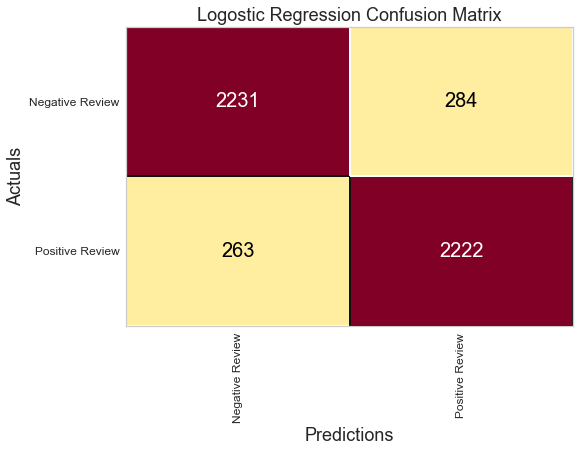

In [44]:
## Lets create the label for confusion Matrix
## As we know from week 3 that if positive sentiment is considered when polarity score is greater than or equal to zero. 
## And if polarity score is less than zero then it is negative sentiment. 

label = {0: 'Negative Review', 1: 'Positive Review'}

## lets create variable for confusion matrix

CMatrix = ConfusionMatrix(Log_Reg, encoder = label,  percent=False)

## Lets fit the confusion matrix on testing set

CMatrix.fit(X_test_tfidf_V, Y_test)

## Lets find out the accuracy of the model on the test set

Accuracy = 100*CMatrix.score(X_test_tfidf_V, Y_test)

print('The Model Accuracy is: ', round(Accuracy,2), '%', sep = '')

## changing the label fontsize in the confustion matrix

for labelsize in CMatrix.ax.texts:
    labelsize.set_size(20)

## Lets show the confusion matrix for the test set
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logostic Regression Confusion Matrix', fontsize=18)
plt.show()

### 8. Get the precision, recall, and F1-score for the test set predictions.

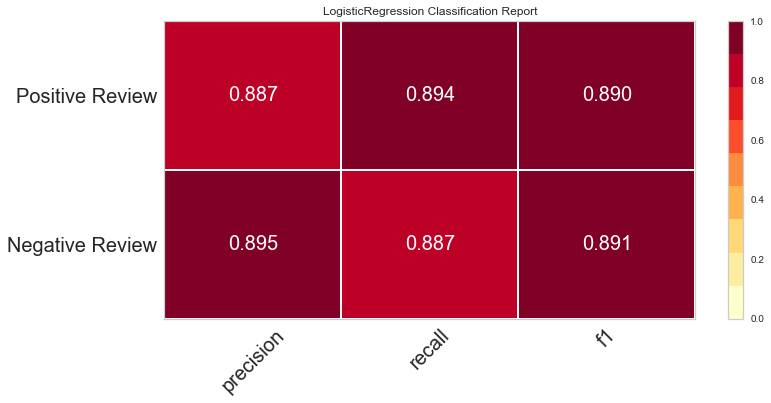

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [45]:
## Using the classificationReport to get the precision, recall, and F1-score
## Lets adjust the size and fonts for the figure. 

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 20

## Lets instantiate the classification visualizer
visualizer = ClassificationReport(Log_Reg, encoder = label)

## Lets fit the visualizer and the model
visualizer.fit(X_train_tfidf_V, Y_test)  
                     
## Lets evaluate the model on the test data
visualizer.score(X_test_tfidf_V, Y_test)  

## Finalize and show the figure
visualizer.show()

### 9. Create a ROC curve for the test set.

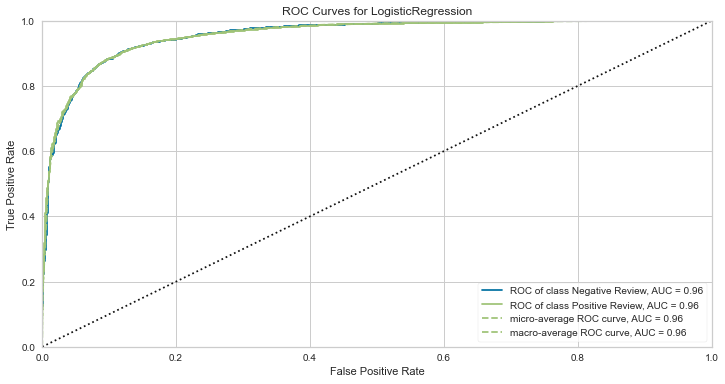

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [46]:
## Lets create the ROC curve for the test set

## Lets instantiate the ROCAUC visualizer
ROCAUC_visualizer = ROCAUC(Log_Reg, encoder = label, solver = 'liblinear')

## Lets fit the visualizer and model on the test data set
ROCAUC_visualizer.fit(X_test_tfidf_V, Y_test)

## Lets evaluate the model on the test data
ROCAUC_visualizer.score(X_test_tfidf_V, Y_test)  

## Finalize and show the figure
ROCAUC_visualizer.show()

### 10. Pick another classification model you learned about this week and repeat steps (5) – (9).

#### Picking the Random Forest classification model.

In [47]:
## Lets import Random Forest regression model
from sklearn.ensemble import RandomForestClassifier

## Lets instantiate the Random Forest
random_forest = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features=None, min_samples_leaf=30)

In [48]:
## Lets fit the model on the train data set

random_forest.fit(X_train_tfidf_V, Y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=70,
                       n_jobs=-1, oob_score=True, random_state=101)

The Model Accuracy is: 82.75%


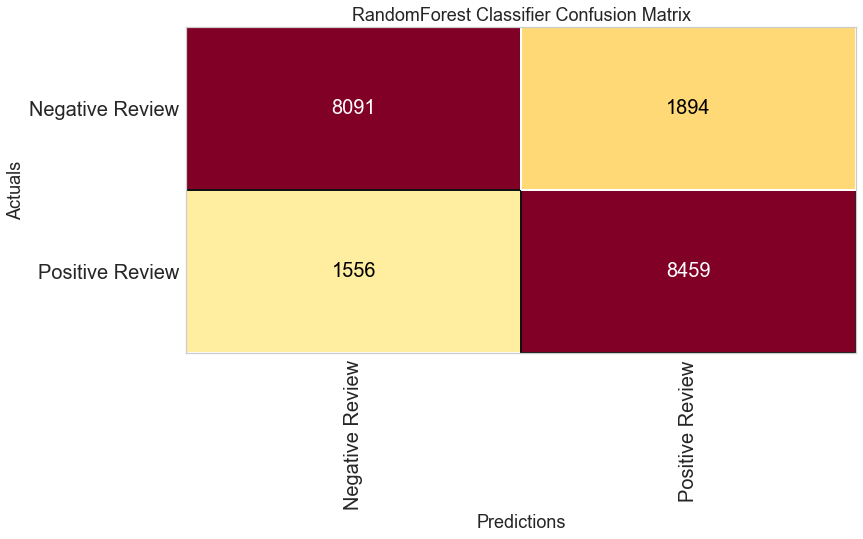

In [49]:
## Lets create the label for confusion Matrix
## As we know that positive sentiment is considered when polarity score is greater than or equal to zero. 
## And if polarity score is less than zero then it is negative sentiment. 

## Specify the target classes
label_RF = {0: 'Negative Review', 1: 'Positive Review'}

## lets create variable for confusion matrix
CMatrix_RF = ConfusionMatrix(random_forest, encoder = label_RF,  percent=False) #update model to rfm

## Lets fit the train set to the confusion matrix
CMatrix_RF.fit(X_train_tfidf_V, Y_train)

## Lets find out the accuracy of the model
Accuracy_RF = 100*CMatrix_RF.score(X_train_tfidf_V, Y_train)

print('The Model Accuracy is: ', round(Accuracy_RF,2), '%', sep = '')

## changing the label fontsize in the confustion matrix

for label in CMatrix_RF.ax.texts:
    label.set_size(20)

## Lets show the confusion matrix
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('RandomForest Classifier Confusion Matrix', fontsize=18)
plt.show()

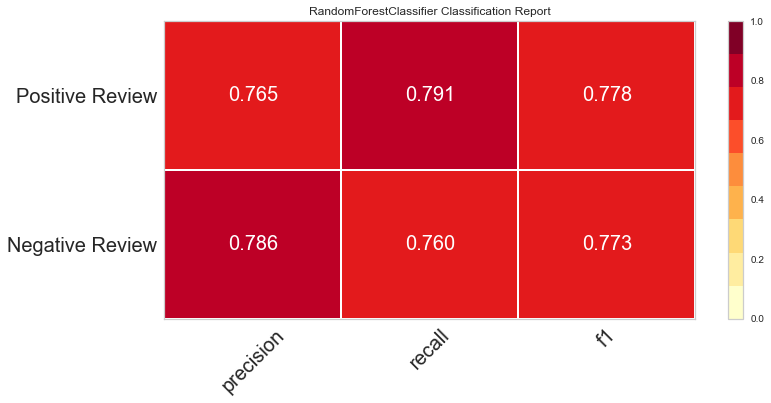

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [50]:
## Using the classificationReport to get the precision, recall, and F1-score
## Lets adjust the size and fonts for the figure. 

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 20

## Lets instantiate the classification visualizer
visualizer_RF = ClassificationReport(random_forest, encoder = label_RF)

## Lets fit the visualizer and the model to the test data set
visualizer_RF.fit(X_train_tfidf_V, Y_test)  

## Lets evaluate the model on the test data
visualizer_RF.score(X_test_tfidf_V, Y_test) 

## Finalize and show the figure
visualizer_RF.show()

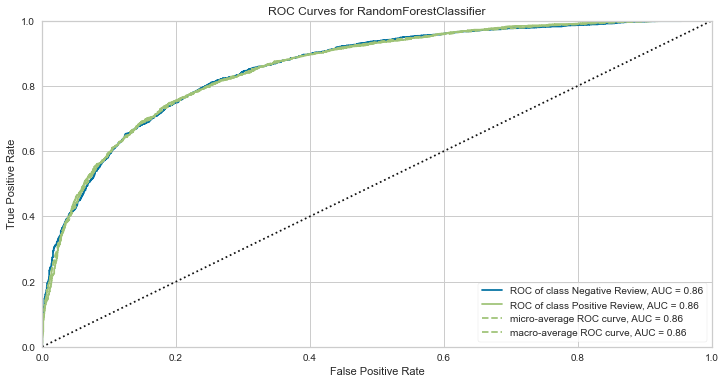

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
## Lets create the ROC curve for the test set

## Lets instantiate the ROCAUC visualizer
ROCAUC_visualizer_RF = ROCAUC(random_forest, encoder = label_RF, solver = 'liblinear')  #update model to rfm

## Lets fit the visualizer and model on the test data set
ROCAUC_visualizer_RF.fit(X_test_tfidf_V, Y_test)

## Lets evaluate the model on the test data
ROCAUC_visualizer_RF.score(X_test_tfidf_V, Y_test)  

## Finalize and show the figure
ROCAUC_visualizer_RF.show()